･ (Period to calculate initial phase)		=  1e-10  ~  3e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
Simulate with default values.
[{'time': 3.02e-10, 'phase': 1, 'element': 'P(B1|X1+B2|X1)'}, {'time': 4.02e-10, 'phase': 2, 'element': 'P(B1|X1+B2|X1)'}, {'time': 5.02e-10, 'phase': 3, 'element': 'P(B1|X1+B2|X1)'}, {'time': 4.07e-10, 'phase': 1, 'element': 'P(B1|X1|X2+B2|X1|X2)'}, {'time': 5.0875e-10, 'phase': 2, 'element': 'P(B1|X1|X2+B2|X1|X2)'}, {'time': 4.1825e-10, 'phase': 1, 'element': 'P(B1|X1|X3+B2|X1|X3)'}, {'time': 5.27e-10, 'phase': 2, 'element': 'P(B1|X1|X3+B2|X1|X3)'}]


,low(value),low(%),high(value),high(%)
BIAS,0.004687,-99.609375,2.400000,100.00000
SQUIDJJ,1.082812,-9.765625,1.246875,3.90625
JTLL,0.585938,-94.140625,13.281250,32.81250


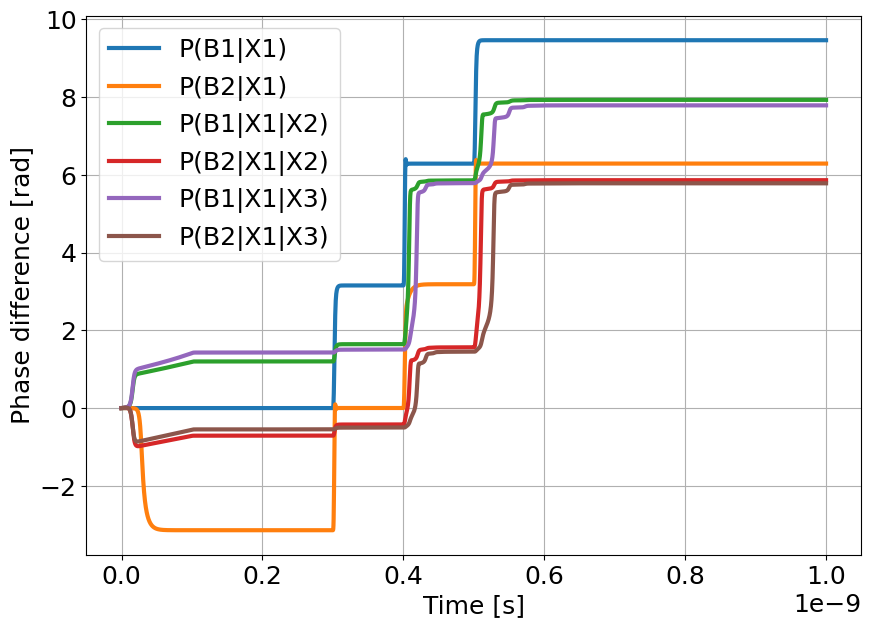

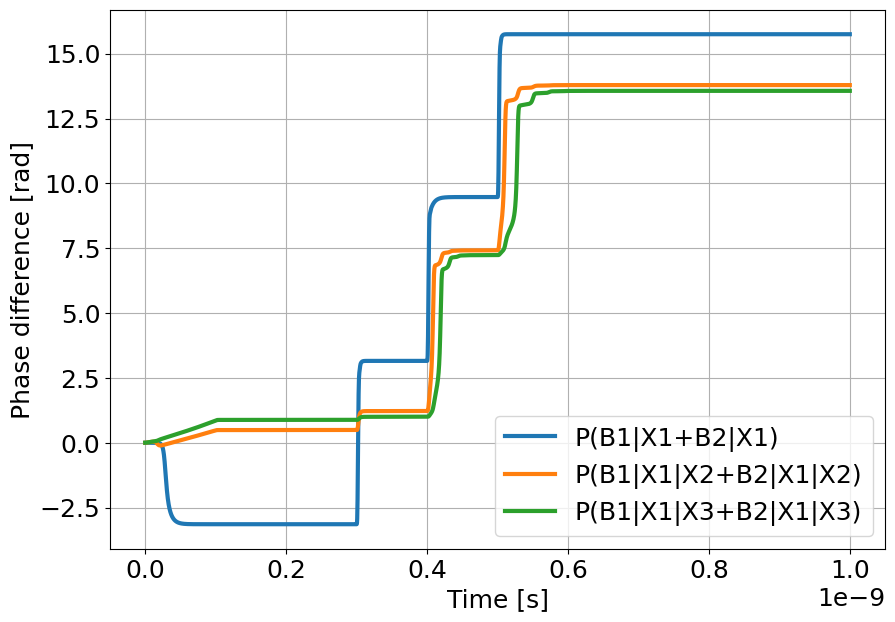

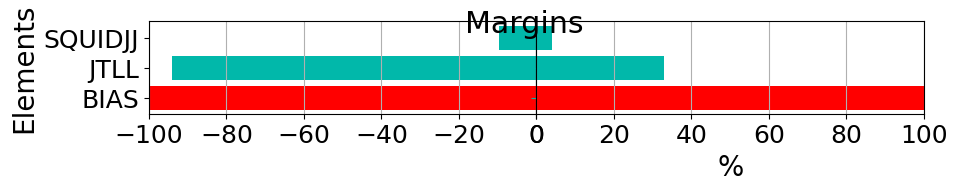

In [1]:

netlist = """

*JSIM model
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)


.subckt jtl_squid   3       5 
L1                  3       1   2pH fcheck
L2                  3       4   2pH fcheck
B1                  1       5   jjmod area=#SQUIDJJ(1.2,lower=0.5)
R1                  1       5   4.2ohm 
B2                  2       5   jjmod area=#SQUIDJJ(1.2,lower=0.5)
R2                  2       5   4.2ohm
B3                  4       2   pjjmod area=10
R3                  4       2   0.2ohm
.ends

.subckt jtl_base        1   3
L1                      1       2       #JTLL(10)pH
Ib                      2       0       pwl(0ps 0uA 100ps -60uA)
L2                      2       3       #JTLL(10)pH
X1    jtl_squid         3       0      
.ends

* Example JTL Basic
VIN                     1       0       pwl(0 0 300p 0 301p 0.5175mV 302p 0.5175mV 303p 0  400p 0 401p 0.5175mV 402p 0.5175mV 403p 0  500p 0 501p 0.5175mV 502p 0.5175mV 503p 0)
X1      jtl_squid       1       0
X2      jtl_base        1       2 
X3      jtl_base        2       3
X4      jtl_base        3       4    
X5      jtl_base        4       5   
X6      jtl_base        5       6    
X7      jtl_base        6       7    
X8      jtl_base        7       8    
X9      jtl_base        8       9    
X10     jtl_base        9       10    
X11     jtl_base        10      11  
X12     jtl_base        11      12   
X13     jtl_base        12      13  
X14     jtl_base        13      14   
X15     jtl_base        14      15           
R3                      15      16      8.32ohm
L5                      16      0       2pH

***Vb                      100     0       pwl(0ps 0mV 100ps #BIAS(1.2)mV)

.tran 0.25p 1000p 0 0.25p
.print PHASE ?
.print PHASE ?

.print PHASE ?
.print PHASE ?
.end
"""

config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":300e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": [["B1|X1","B2|X1"],["B1|X1|X2","B2|X1|X2"],["B1|X1|X3","B2|X1|X3"]],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}


from optimize import data
import importlib
importlib.reload(data)

d = data.Data(netlist, config_data)
print(d.get_base_switch_timing())
d.get_margins()
d.optimize("/src")